# Performing your own PCA

The goal is to load a new dataset on the type of absenteeism, and see what variables are good explanatory factors. To this purpose, we will calculate the principle components, see how much variance they capture, and what variables are important in each component.

## The dataset

First, let's load the data:

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

# For bigger pictures:
#plt.rcParams["figure.dpi"] = 144

data = pd.read_csv("absent.csv",sep=';',index_col=0)

print(data.describe())

       Reason for absence  Month of absence  Day of the week     Seasons  \
count          740.000000        740.000000       740.000000  740.000000   
mean            19.216216          6.324324         3.914865    2.544595   
std              8.433406          3.436287         1.421675    1.111831   
min              0.000000          0.000000         2.000000    1.000000   
25%             13.000000          3.000000         3.000000    2.000000   
50%             23.000000          6.000000         4.000000    3.000000   
75%             26.000000          9.000000         5.000000    4.000000   
max             28.000000         12.000000         6.000000    4.000000   

       Transportation expense  Distance from Residence to Work  Service time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.38487

## Applying PCA

We are lucky to have all numeric variables. Now, let's apply PCA:

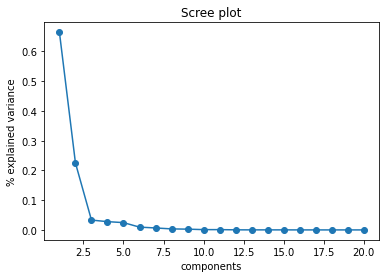

In [2]:
pca = PCA()
pca.fit(data)

# Scree plot
plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title("Scree plot")
plt.show()

Now, find all principle components for which the explained variance is above a certain threshold. Store them as the array of weights that they are, not as an index. Also, return the explained variance of the component in a separate array.

In [3]:
def retain_explanatory_components(pca, threshold):
    components = []
    importance = []

     ### BEGIN SOLUTION
    # Loop over the principle components
    for comp in range(0,len(pca.components_)):
        
        # For every component, chec whether the explained version exceeds the given threshold
        if pca.explained_variance_ratio_[comp] > threshold:
            
            # If so, add the components to the lists
            importance.append(pca.explained_variance_ratio_[comp])
            components.append(pca.components_[comp])
    ### END SOLUTION
    
    return components, importance

Test your answer:

In [4]:
assert np.allclose(retain_explanatory_components(pca, 0.2)[0][0], np.array([-1.48852242e-02,  6.99276802e-03,  7.66122250e-04,  6.11880312e-04,
        9.96345639e-01,  6.05407010e-02, -2.30112351e-02, -2.26092910e-02,
        4.37804005e-03, -4.51306692e-03,  3.63385170e-04, -5.52332388e-04,
        6.25535756e-03,  1.07400187e-03,  1.72931820e-04,  7.89616935e-03,
       -4.16652431e-02, -1.80645216e-02, -9.16830153e-03,  5.39009095e-03]))
assert np.allclose(retain_explanatory_components(pca, 0.2)[0][1], np.array([-2.83060899e-02, -1.50170564e-02,  4.84166019e-04,  4.29205251e-03,
       -3.39209703e-03, -3.19059877e-02, -4.41430730e-04, -6.49555188e-03,
        9.98550107e-01, -8.56669798e-03,  1.81246521e-04, -1.18565709e-03,
        7.37281060e-04, -5.32303645e-04,  2.21123540e-04,  1.01739263e-04,
       -1.37819309e-02,  1.71134026e-02, -1.06918322e-02,  1.03709466e-02]))
assert np.allclose(retain_explanatory_components(pca, 0.2)[1][0],0.6646304049437459)
assert np.allclose(retain_explanatory_components(pca, 0.2)[1][1],0.22517768476979574)

## Finding important variables with PCA

Now, let's check what variables are important in the two components that were withheld at a threshold of 10% explained variance.
To do this, write a function that withholds all the important variables as a list of column names:

In [5]:
def find_relevant_variable(component, threshold):
    variables = []
    weights = []
    
    ### BEGIN SOLUTION
    # Loop the variables/columns of the data
    for index, variable in enumerate(data.columns):
        # Check whether the variable's absolute loading in the component exceeds the threshold
        if abs(component[index]) > threshold:
            
            # If so, store the variable and its loading
            variables.append(variable)
            weights.append(component[index])
    ### END SOLUTION
    
    return variables, weights

Test your answer:

In [6]:
assert find_relevant_variable(pca.components_[2],0.1)[0] == ['Reason for absence',
  'Distance from Residence to Work',
  'Height',
  'Absenteeism time in hours']
assert np.allclose(find_relevant_variable(pca.components_[2],0.1)[1],[-0.188797388634668,
  -0.8451595574544256,
  0.15549031378361947,
  0.45863653707083685])

So, these functions should demonstrate what components, and what variables, are important in which components. Keep these things in mind and test some more on your own to get a good idea of what is happening. For example, we can clearly see that the second component is very much influenced by 'Distance from residence to work'. Nevertheless, the first two components are more important, and the variables influencing them are probably interesting to look at as well.